Introduction to Python. 

Firstly, why Python vs. R vs. Matlab

1. Python is extremely full featured. There are libraries for Network Analysis, Machine learning, Image analysis, and video analysis.

2. Python is (relatively) very readable. Almost looks like Pseudo code and because multiple 'top level' variable types variables don't look and  act weirdly.

3. Python can interact cleanly with multiple data types smoothly.

4. Large community, for almost any problem you can just look up "Python [problem]" and someone will have an answer for you.

5. Easy-ish to install/script into larger programs/make portable

6. Because a lot of people use it you'll probably have to deal with it someday

7. Fast- almost always faster than Matlab, often faster than R.


Lesson plan for today:

We'll go over a few datatypes in Python and what they mean and some of the basics of running Python on your computer.

We'll then write a simple VCF parser in Python.

If we have time, I'll give some examples of setting up ways to run shell scripts with Python on the HPC.


What you need to install- https://www.anaconda.com/distribution/
Anaconda is a distribution of Python that contains everything you need to get Python up and running it also has virtual environments and is complied for multiple OS's there is also a copy on the HPC.

Once this is installed you should have something called 'Navigator' it's a green circle. Open it and you'll see a few things:

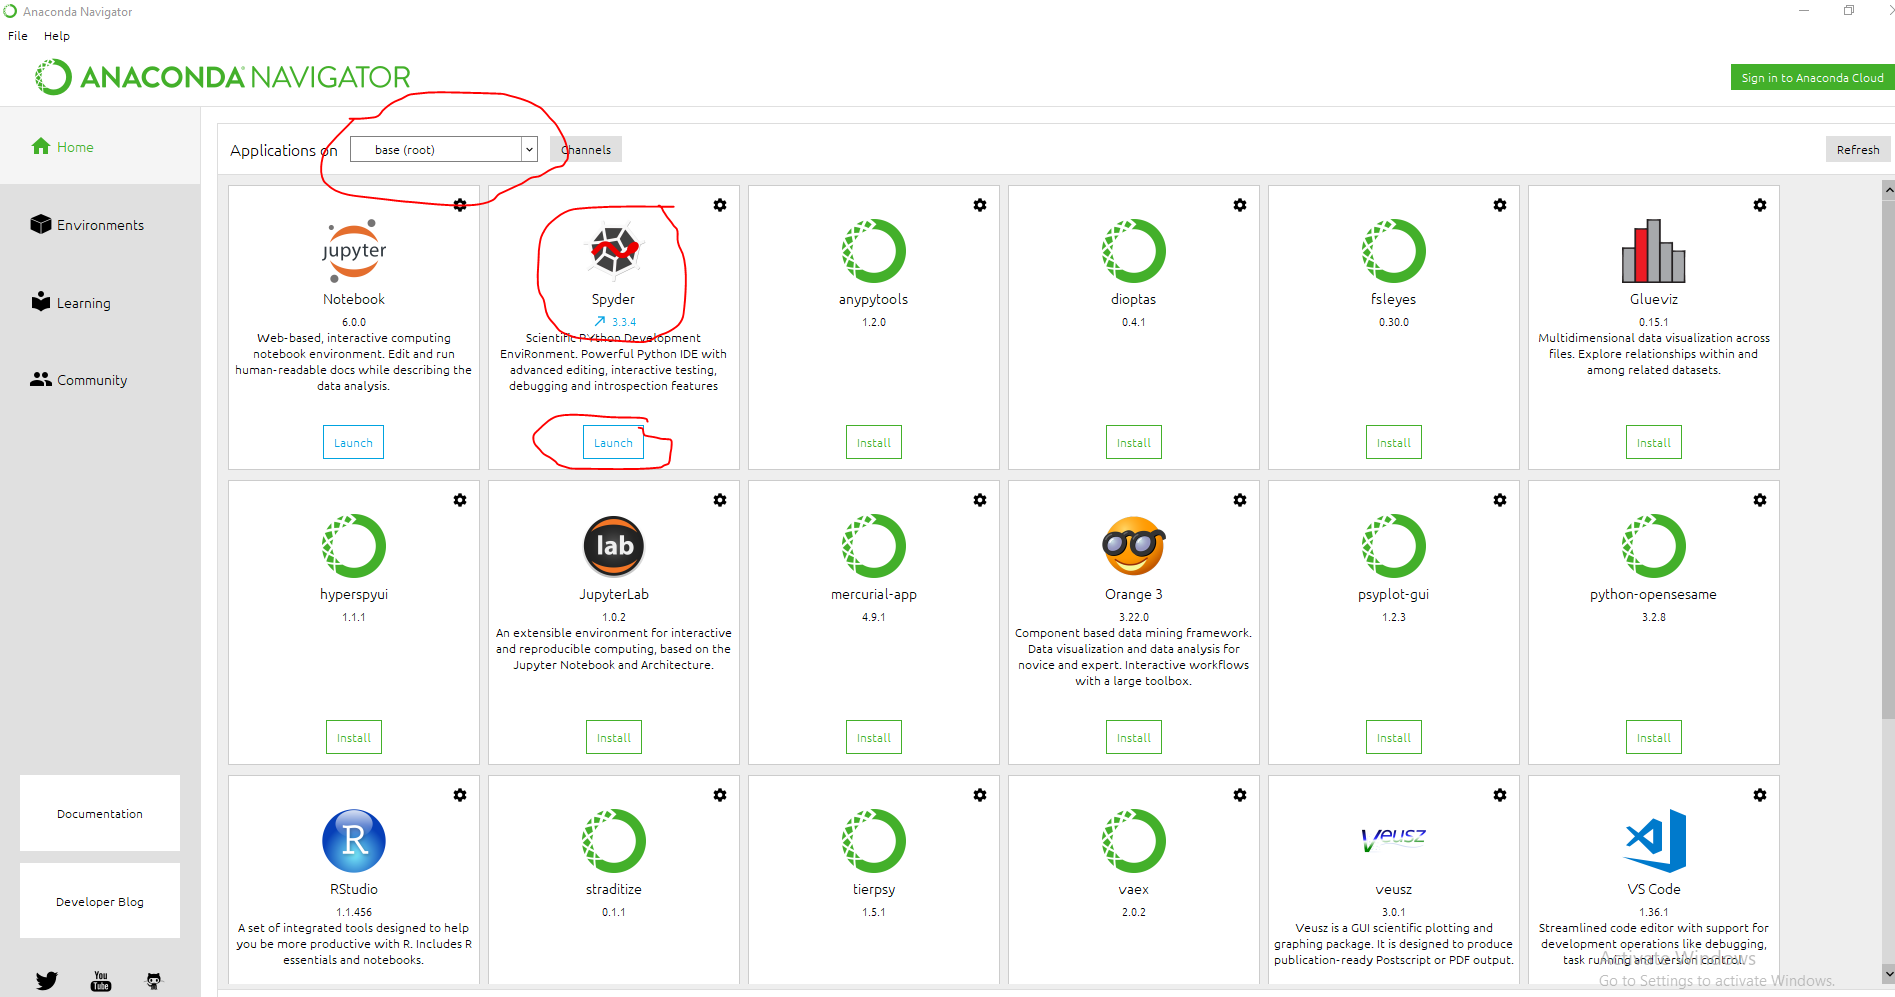

In the top left you'll see your current environment, it should default to 'base' we'll deal with that later. There should also be a Spyder icon if you followed directions yours should be ready to launch otherwise it needs to be installed. Click the Launch button!

Hopefully, It launched when it does this should look pretty farmiliar as RStudio and Spyder are both based on Matlabs GUIde.

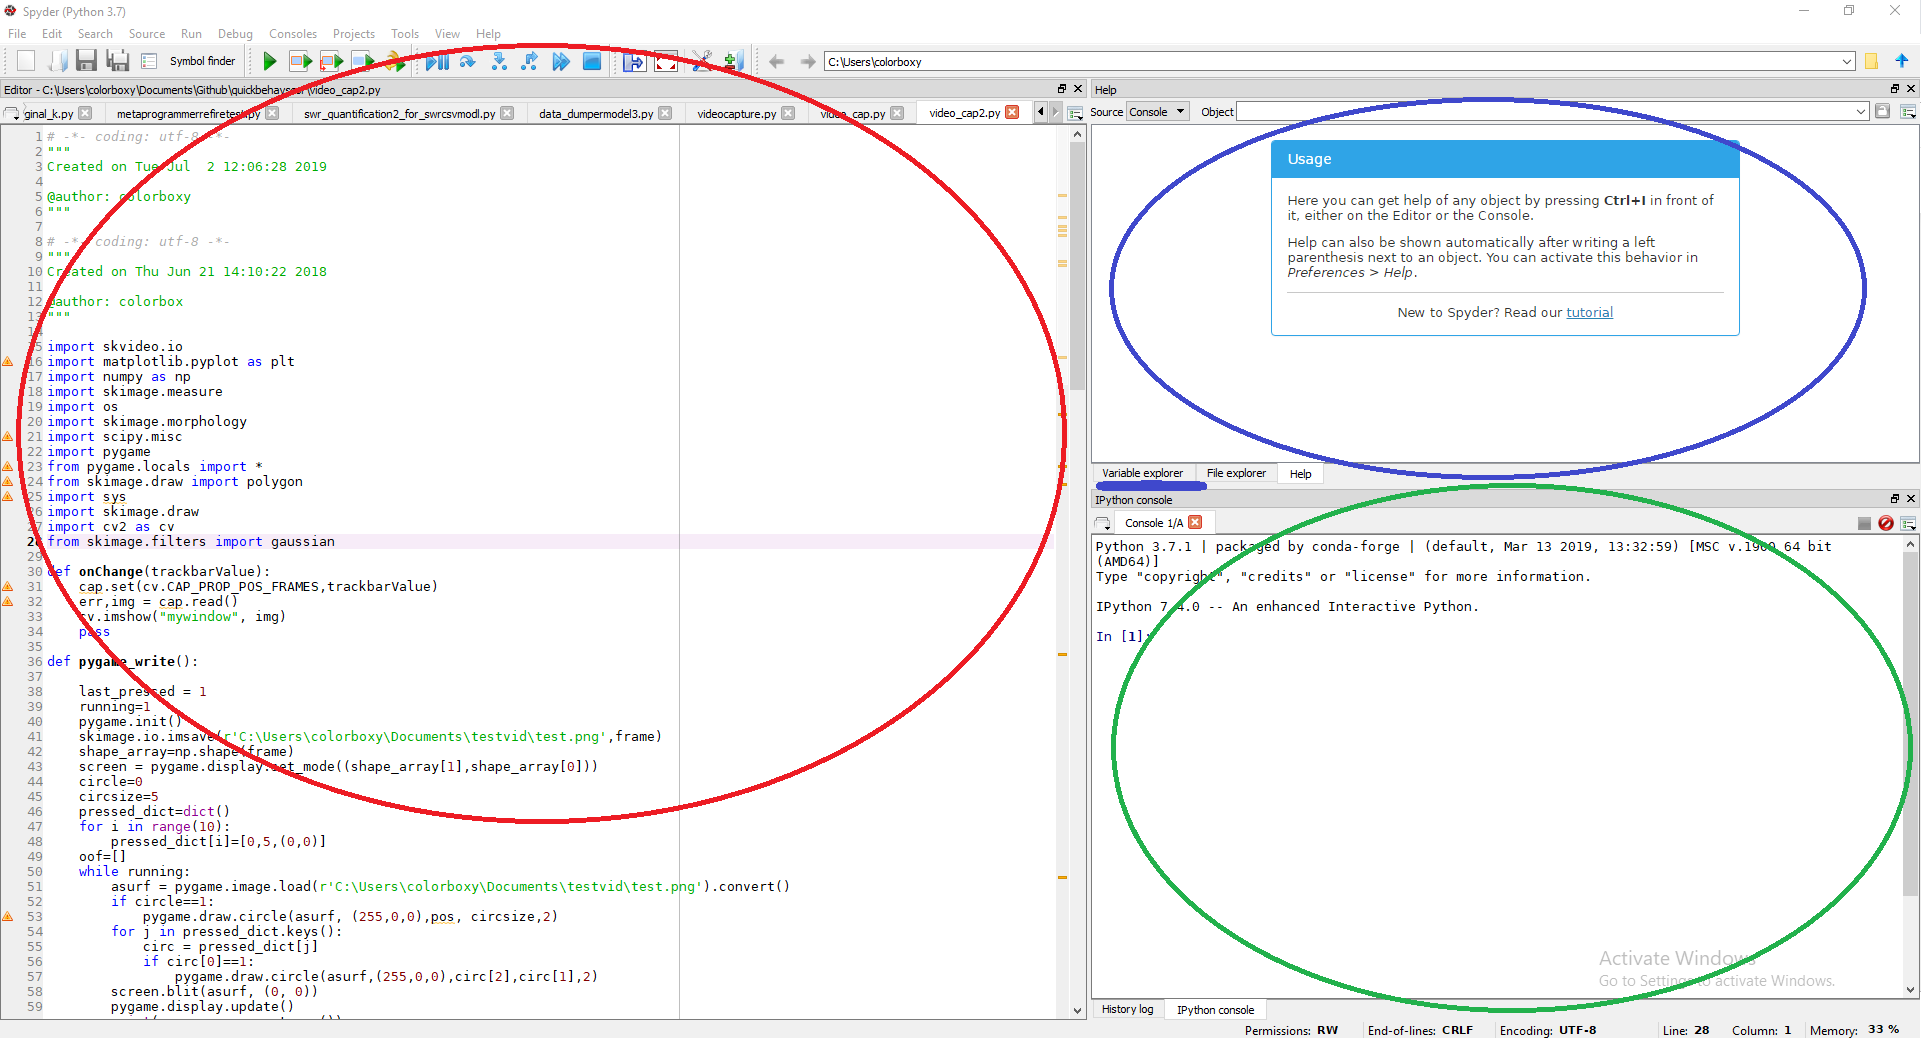

Above I've highlighted some key areas. In the red circle is your Editor, this is where you'll write your code. Don't worry about what I was trying to write there. 

In the green circle is your 'Console' this is where your code 'runs' You can kill your current console with the red X. You can also code directly into your console. (Also you'll notice on the bottom tab there is a History log this is where your old commands go). 

In the Blue you see the help window (which tbh doesn't work that well) and the Variabile Explorer, which is extremely helpful, with some exceptions any variable currently defined will show up there! 

Also up top is your current folder anything you run in the Conosole will act on that folder. (As a weird quirk things run from your editor will run where the files are stored just a heads up)


In [187]:
'Some preliminary code matters'
# If there is a pound sign it's a comment if it's after a pound it won't do anything I'll include these
#to explain how lines work
''' three quotes will give a multiline comment Ill use these 
when I need to explain somehting more complex'''
#Data types we'll be working with:
a = 'letters' #quote characters will indicte strings strings are just text char
b = 1 #this is a number, in python 3 the code will guess if we want a string or float
c = ['1',1,'a',4,6] # this is a list you declare it with brackets it can take *any* data type
# if we want something to print out we'll throw a print() around it
print(c)
'''finally the last data strucuture is a dictionary
A dictionary is a quirky data structure, think of it as a data table but unstructured
so you can call it by name, but not index, and you can store anything in it. Dictionaries have some speed
advnatages we wont go into and they are convenient to store data by name, we"ll mostly use them in this lecture
to get and process data off the internet!'''
mydict={'a':2,'b':3,'c':[1,2,3,4]}
print(mydict['c'])
print(mydict.keys())

['1', 1, 'a', 4, 6]
[1, 2, 3, 4]
dict_keys(['a', 'b', 'c'])


In [7]:
#accessing items in a list
a=[1,2,3,4,5]
print(a[-1])#last item in a list
print(a[1:4])# 2nd through 4th item
b='This is a bunch of words'
print(b.split(' ')) #splitting a string into a list
for i in range(10): #loop structure
    print(i)
for i in range(10): #loop flow control
    if i%2==0:
        print(i)
    else:
        print('not divisible')
for i in range(10):
    if i%2==0:
        continue #means cut loop here and restart at top
    if i>4:
        break #means stop looping
    print(i)
    
mydict={'a':2,'b':3,'c':[1,2,3,4]}
mydict['n']=5
for i in range(30):
    mydict[i] = i*100
print(mydict[3])

5
[2, 3, 4]
['This', 'is', 'a', 'bunch', 'of', 'words']
0
1
2
3
4
5
6
7
8
9
0
not divisible
2
not divisible
4
not divisible
6
not divisible
8
not divisible
1
3
300


Now we are going to write a VCF processor from scratch, note this is kind of a toy example, you'd probably never *actually* want to do this as it would be rather error prone but it's a good training example. So our goal:

Take a VCF file, and output a csv annotating it. We want the following info:


type of variation

Clinical signifigance

Gene name and coding type from the Broad institute

The alleleic frequency from broad



First thing we'll need to do is import some tools in Python, in Python these are called modules, they add functionality to Python, we'll import json and requests as we are going to be calling information from the internet. We'll also import numpy as np. Numpy is an enhanced math module for python, we won't be using it's 'full power'. 


Note: Installing more modules is easy in python but beyond the scope of current tutorial, you can open up the terminal for your anaconda environment and type 'pip install [packagenname]'

In [12]:
import json
import requests
import numpy as np

Next we need to open the file, to do that in Python we'll call open('filename') and set the open 'object' as a name. We can step through the file one line at a time by calling object.readline()

In [13]:
VCFfile = open(r'C:\Users\colorboxy\Downloads\clinvar.vcf\clinvarmod.vcf')
header = VCFfile.readline()
print(header)

##fileformat=VCFv4.1



If we were to go open this file in a text editor or step through it line by line we'd quickly realize there are about 100 useless lines at the start of the file. So next we are going to set up a for loop to skip through the top of the file until we get to our relevant data (we are doing this line by line instead of opening all the data at once because VCF files can be really really big so we don't want to pull it into memory).

in python for loops are formatted as

for object in iterable:
    
    [do stuff with object]
    
in this case we will just 'continue' (ie skip out of the loop if there is a # indicating a header) and break if it's not.
This will leave us at the first 'real line' of the file. so we can work with it.


In [14]:

VCFfile = open(r'C:\Users\colorboxy\Downloads\clinvar.vcf\clinvarmod.vcf')
for line in VCFfile:
    if line[0] =="#":
        continue
    else:
        break

now we will call a line and see what is in it

In [15]:
line=VCFfile.readline()
print(line)
print(type(line))

1	949502	542074	C	T	.	.	AF_ESP=0.00015;AF_EXAC=0.00010;ALLELEID=514926;CLNDISDB=MedGen:C4015293,OMIM:616126,Orphanet:ORPHA319563;CLNDN=Immunodeficiency_38_with_basal_ganglia_calcification;CLNHGVS=NC_000001.10:g.949502C>T;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=ISG15:9636;MC=SO:0001583|missense_variant;ORIGIN=1;RS=150861311

<class 'str'>


Tab seperated data which we can open the file in a text editor and get the identities as  #CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	normal	vaf5. So lets split the data, as you can see above, line is a string. Each datatype/object in python has built-in methods so we can call those functions. One strings has is the 'split()' command so string.split('character to split on') so line.split('\t') will split on tabs '\t' represents tab.

If we got to the Exac site we can figure out the format for API calls (these are calls you acan do on webpagets to get info, the structrue is:
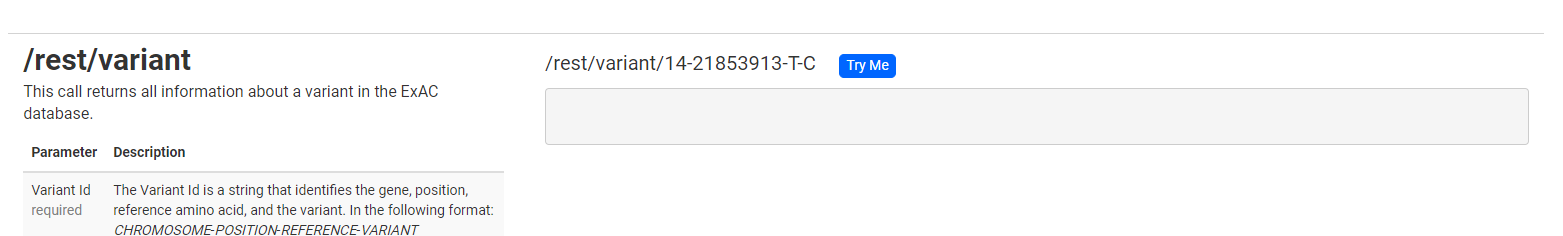
So chromosome-position,reference,variant, so we'll need to parse those out.

When we do split we get a list, to call elements of a list we do list_name[position] So list_name[4] would get us the 5th element of the list (Python 0 indexes) So based on the header we pulled above we can do the following:

In [16]:


myline = line.split("\t")
chromosome = myline[0]
position = myline[1]
ref = myline[3]
alt = myline[4]
print(chromosome)
print(position)
print(ref)
print(alt)
print(myline[0:4])


1
949502
C
T
['1', '949502', '542074', 'C']


We can combine strings in Python with the + operators so 'a'+'b'='ab' Doing this we can use the requests packaged to 'get' the data from the API. This command will run slow because it literally has to go to the internet and pull down the data

In [17]:
more_info = requests.get("http://exac.hms.harvard.edu/rest/variant/" + chromosome + "-" + position + "-" + ref + "-" + alt)
print(more_info)

<Response [200]>


So a response is a strange data type if we go to the page: http://exac.hms.harvard.edu/rest/variant/1-949502-C-T We can see this is returning a json so we need to convert it to a json (tho there are other datatypes, like XML we could convert it to. Requests has a .json() built in, if you wanted to see waht else it had built in you could google 'python requests'

In [18]:
print(more_info.json()) #printing the data in json format
print(type(more_info.json()))

{'consequence': {'missense_variant': {'ENSG00000187608': [{'SYMBOL': 'ISG15', 'HGNC_ID': '4053', 'Codons': 'Cac/Tac', 'MOTIF_NAME': '', 'Consequence': 'missense_variant', 'SIFT': 'tolerated(0.32)', 'CDS_position': '142', 'Allele': 'T', 'CCDS': 'CCDS6.1', 'PolyPhen': 'benign(0.007)', 'MOTIF_SCORE_CHANGE': '', 'HGVSp': 'ENSP00000368699.4:p.His48Tyr', 'ENSP': 'ENSP00000368699', 'major_consequence': 'missense_variant', 'INTRON': '', 'Existing_variation': 'rs150861311', 'HGVSc': 'ENST00000379389.4:c.142C>T', 'LoF_filter': '', 'AA_MAF': 'T:0', 'LoF_flags': '', 'AFR_MAF': '', 'cDNA_position': '293', 'PUBMED': '', 'ALLELE_NUM': '1', 'Feature_type': 'Transcript', 'GMAF': '', 'Gene': 'ENSG00000187608', 'Feature': 'ENST00000379389', 'LoF_info': '', 'SWISSPROT': 'ISG15_HUMAN', 'UNIPARC': 'UPI0000048D70', 'EUR_MAF': '', 'DOMAINS': 'Pfam_domain:PF00240&PROSITE_profiles:PS50053&SMART_domains:SM00213&Superfamily_domains:SSF54236', 'LoF': '', 'HIGH_INF_POS': '', 'STRAND': '1', 'DISTANCE': '', 'EA_MAF':

That's a lot of data, and you'll notice it's deserializing that data into a dictionary. We can prob dictionaries by seeing what their 'keys' are (keys are the 'a', 'b', 'c'  of the original example. Unfortunatley Json's are actually pretty bad data strucutres and to explore them requires a lot of pretty painstaking looping. But we don't need that we just need the variant type and the gene name.

In [19]:
data=more_info.json()
print(data.keys())
print('and calling the consequnce key')
print(data['consequence'])
print(data['consequence'].keys())

dict_keys(['consequence', 'base_coverage', 'variant', 'metrics', 'any_covered'])
and calling the consequnce key
{'missense_variant': {'ENSG00000187608': [{'SYMBOL': 'ISG15', 'HGNC_ID': '4053', 'Codons': 'Cac/Tac', 'MOTIF_NAME': '', 'Consequence': 'missense_variant', 'SIFT': 'tolerated(0.32)', 'CDS_position': '142', 'Allele': 'T', 'CCDS': 'CCDS6.1', 'PolyPhen': 'benign(0.007)', 'MOTIF_SCORE_CHANGE': '', 'HGVSp': 'ENSP00000368699.4:p.His48Tyr', 'ENSP': 'ENSP00000368699', 'major_consequence': 'missense_variant', 'INTRON': '', 'Existing_variation': 'rs150861311', 'HGVSc': 'ENST00000379389.4:c.142C>T', 'LoF_filter': '', 'AA_MAF': 'T:0', 'LoF_flags': '', 'AFR_MAF': '', 'cDNA_position': '293', 'PUBMED': '', 'ALLELE_NUM': '1', 'Feature_type': 'Transcript', 'GMAF': '', 'Gene': 'ENSG00000187608', 'Feature': 'ENST00000379389', 'LoF_info': '', 'SWISSPROT': 'ISG15_HUMAN', 'UNIPARC': 'UPI0000048D70', 'EUR_MAF': '', 'DOMAINS': 'Pfam_domain:PF00240&PROSITE_profiles:PS50053&SMART_domains:SM00213&Superf

Doing this we can see the consequence gives us the variant type with keys of what types of variants they are. Calling the first variant type (you could change this based on your needs). we get:

In [20]:
data['consequence'].keys()[0]

TypeError: 'dict_keys' object does not support indexing

An error because keys cannot be indexed, we need to convert the dataype to list so we can index.

In [21]:
data = more_info.json()
coding = list(data['consequence'].keys())[0]
#then using coding to get the gene:
gene= data["consequence"][coding]

print(coding)
print(gene)

#Gene you'll see is a dictionary we only want the key, as it's the gene
gene= list(gene.keys())[0]

print(gene)

missense_variant
{'ENSG00000187608': [{'SYMBOL': 'ISG15', 'HGNC_ID': '4053', 'Codons': 'Cac/Tac', 'MOTIF_NAME': '', 'Consequence': 'missense_variant', 'SIFT': 'tolerated(0.32)', 'CDS_position': '142', 'Allele': 'T', 'CCDS': 'CCDS6.1', 'PolyPhen': 'benign(0.007)', 'MOTIF_SCORE_CHANGE': '', 'HGVSp': 'ENSP00000368699.4:p.His48Tyr', 'ENSP': 'ENSP00000368699', 'major_consequence': 'missense_variant', 'INTRON': '', 'Existing_variation': 'rs150861311', 'HGVSc': 'ENST00000379389.4:c.142C>T', 'LoF_filter': '', 'AA_MAF': 'T:0', 'LoF_flags': '', 'AFR_MAF': '', 'cDNA_position': '293', 'PUBMED': '', 'ALLELE_NUM': '1', 'Feature_type': 'Transcript', 'GMAF': '', 'Gene': 'ENSG00000187608', 'Feature': 'ENST00000379389', 'LoF_info': '', 'SWISSPROT': 'ISG15_HUMAN', 'UNIPARC': 'UPI0000048D70', 'EUR_MAF': '', 'DOMAINS': 'Pfam_domain:PF00240&PROSITE_profiles:PS50053&SMART_domains:SM00213&Superfamily_domains:SSF54236', 'LoF': '', 'HIGH_INF_POS': '', 'STRAND': '1', 'DISTANCE': '', 'EA_MAF': 'T:0.000233', 'Prot

Now we've got all need from the internet back to our desktop and parsing out our file remember our original list of targets:

type of variation (which we can get from Broad or from our data set as they've already pulled it from Broad for us.)

Clinical signifigance

Gene name from the Broad institute

The alleleic frequency

and our  headers:
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO

if we dig into our header we'll find most of the infor we want is coded under INFO.

So the best way to store this data would probably be into a dictionary, as this would give us the ability to flexibble call the data, but it's also a lot of overhead to do this so if it was a 'one time' code we could probalby justg get what we want by it's position.

In [22]:
print(myline[7]) #<- this is where INFO data is stored in the 8th position, python 0 indexes)
# we only want the read type so the last element so we split on the ;
info = myline[7].split(';')
# and take the 8th element of the list [8], then split on the = and take the elment after the = [-1]
sig_val = info[7].split("=")[-1]
print(sig_val)
#this is also unstable and relies on them having 'done it right' to convert this into a dictionary instead:
info_dict={} #curly brackets for a dictionary
for val in info:
    tokens=val.split('=')
    info_dict[tokens[0]]=tokens[1]
print(info_dict['CLNSIG'])
#this also gives us access to the alleelic frequency and anything else we could want to include!
print(info_dict['AF_EXAC'])

AF_ESP=0.00015;AF_EXAC=0.00010;ALLELEID=514926;CLNDISDB=MedGen:C4015293,OMIM:616126,Orphanet:ORPHA319563;CLNDN=Immunodeficiency_38_with_basal_ganglia_calcification;CLNHGVS=NC_000001.10:g.949502C>T;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=ISG15:9636;MC=SO:0001583|missense_variant;ORIGIN=1;RS=150861311

Uncertain_significance
Uncertain_significance
0.00010


So we got all we needed so lets put it together in one big script. We'll be initializing a  list output that we are going to store data in by 'appending it' to the list. Also because this is fairly slow we'll include a count that keep track of the number of steps we've run. and we'll print out what's run every 100 steps. Note you could also throw a break after that if you wanted it to just stop running. I've also added the line:         

if data['consequence'] == None:

    coding = 'None'

    gene = 'NA'
    
because some of the consequnces are empty (perhaps introns?), so this catches that and throws some variables there allowing the list to complete

In [38]:
#putting it all together!
VCFfile = open(r'C:\Users\colorboxy\Downloads\clinvar.vcf\clinvarmod.vcf')
output = []
count = 0
for line in VCFfile:
    if line[0] =="#":continue
    if line[0]=='':continue
    if line=='':continue
    else:
        count+=1
        myline = line.split("\t")
        chromosome = myline[0]
        position = myline[1]
        ref = myline[3]
        alt = myline[4]
        more_info = requests.get("http://exac.hms.harvard.edu/rest/variant/" + chromosome + "-" + position + "-" + ref + "-" + alt)
        data=more_info.json()
        if data['consequence'] == None or data['consequence']=={}:
            coding = 'None'
            gene = 'NA'
            continue
        else:
            coding = list(data['consequence'].keys())[0]
            gene= list(data["consequence"][coding].keys())[0]
        info = myline[7].split(';')
        for val in info:
            tokens=val.split('=')
            info_dict[tokens[0]]=tokens[1]
        clinical_signifigance = info_dict['CLNSIG']
        allelic_frequency = info_dict['AF_EXAC']
        if count%100==0:
               print(count)
        output.append([chromosome,position,gene,coding,clinical_signifigance,allelic_frequency,ref,alt])
        old_myline=myline

100
500
700


Thea above will run for... a while so what does count%100==0 mean?: this means if the reamineder (modulus) of count has no remainder it will be true. 

Next We specified we wanted a CSV so lets output it like that. First we'll need to open a file and we'll need to specify it's writable then we'll need to write the data line by line, and finally close the file.


Also lets say at the end of the file we also want the mean, median, and STD, min and max  allelic frequency at the of the file. We'll have to use numpy for that, numpy is the 'enhanced math' module for python.


We'll also be using the csv module for python, it actually doens't do much but makes writing csvs jsut a little bit easier.

In [ ]:
import csv
out_file=open(r'C:\Users\colorboxy\Downloads\clinvar.vcf\output.csv','w', newline='')
header= [ 'Chromosome', 'position', 'gene', 'coding', 'Cinical Signifigance','Allelic frequency','Ref codon','Alt Codon']
writer=csv.writer(out_file, delimiter=',')
writer.writerow(header)
#we'll also extract the exac column while we do this
exacs=[]
for outs in output:
    exacs.append(outs[5])
    writer.writerow(outs)
foot_row=['Mean','median','STD','min','max']
writer.writerow(foot_row)
#pull exacs into a numpy array
exacs=np.array(exacs)
print(exacs)

As we can see above exacs is currnetly a bunch of strings we need to convert their type to floats before we do math on them, also we want to limit the output so taht it doesn't end up as something crazy long so we'll be rounding. We'll also be converting the values to string, this isn't strictly necessary but is nice for consistency.

In [ ]:
exacs=exacs.astype('float')
mean = np.mean(exacs)
median = np.median(exacs)
STD = np.std(exacs)
mini = np.min(exacs)
maxi = np.max(exacs)
output_row = np.array([mean,median,STD,mini,maxi])
output_row = np.round(output_row,4) #round all values to 4 places
output_row = output_row.astype('str') #convert to string
writer.writerow(output_row)


In [ ]:
out_file.close()

In [34]:
print(old_myline)

['10', '88649868', '239853', 'C', 'G', '.', '.', 'ALLELEID=240853;CLNDISDB=MedGen:C0027672,SNOMED_CT:699346009|MedGen:C0345893,OMIM:174900,Orphanet:ORPHA329971,SNOMED_CT:9273005|MedGen:CN169374;CLNDN=Hereditary_cancer-predisposing_syndrome|Juvenile_polyposis_syndrome|not_specified;CLNHGVS=NC_000010.10:g.88649868C>G;CLNREVSTAT=criteria_provided,_multiple_submitters,_no_conflicts;CLNSIG=Likely_benign;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=BMPR1A:657;MC=SO:0001819|synonymous_variant;ORIGIN=1;RS=757333646\n']


In [36]:
line

''